In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math




Question 1
a) This is asking what the probability is that UVA wins at least one of the games due to the union symbol. This probability is given thus the answer is 0.75.

b) The probability that UVA wins both games is 0.6 * 0.6 which is 0.36.

c) This is asking what the probability is that the mens team wins given that the womans team wins. This can be calculated by divinding 0.36/0.6 which results in a value of 0.6.

d) This can be calculated by adding the probabilities that each team wins and subtracting the probability that both teams win. This results in   0.6 +   0.6 -0.36 which is equal to 0.84.

e) This problem is asking P(M'|W'). Which is equivalent to 1-P(M|W) which results in 1- 0.6 which is equal to 0.4.

Question 2
The probability of picking a matching pair of socks is 1/7. This is the answer because regardless of which sock you pick first there will be 7 remaining socks. Out of those 7 remaining socks only 1 can match the first sock thus the probability of picking matching socks is 1/7.

Question 3
a)This probability can be determined using a tree diagram which results in the followjng math: (0.013*0.9) + (0.987*0.169) = 0.178503
b)This can be calculated by dividing the number of smokers who have Lung Cancer by the number of total smokers. This will result in a probability of 0.06554621848.
c)THis probability can be calculated by dividing by didviding the number of non-smokers who have lung cancer by the total number of non smokers. This results in 0.01406424112


Question 4 Part 1

<function matplotlib.pyplot.show(close=None, block=None)>

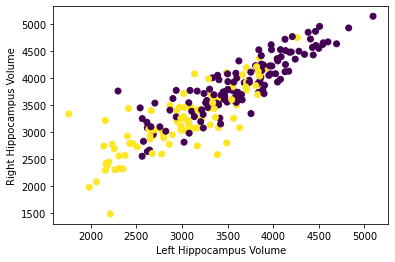

In [177]:
dat = pd.read_csv(r"C:\Users\camda\Downloads\OASIS-hippocampus.csv")
leftHippo = dat['LeftHippoVol']
rightHippo = dat['RightHippoVol']
dementia = dat['Dementia']

x = plt.scatter(leftHippo,rightHippo,c=dementia)
y = x.legend_elements(prop='colors')
plt.xlabel("Left Hippocampus Volume")
plt.ylabel("Right Hippocampus Volume")

plt.show


Question 4 Part 2

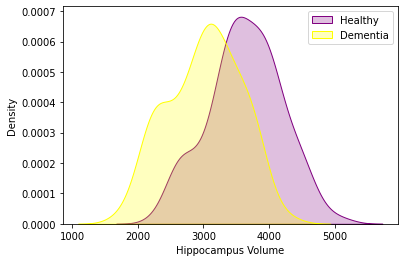

In [178]:
#dat1 = pd.read_csv(r"C:\Users\camda\Downloads\OASIS-hippocampus.csv")
leftHippoND = []
leftHippoD = []

for i in range(len(leftHippo)):
    if dat['Dementia'][i] == 1:
        leftHippoD.append(dat['LeftHippoVol'][i])
    else:
        leftHippoND.append(dat['LeftHippoVol'][i])

df = pd.DataFrame(leftHippoND,columns=['No Dementia'])
df1 = pd.DataFrame(leftHippoD,columns=['Dementia'])
full = [leftHippoD,leftHippoND]

#rightHippo1 = dat1['RightHippoVol']
#dementia1 = dat1['Dementia']

#df1.plot.kde()
fig = sns.kdeplot(data = df['No Dementia'], color='purple',shade='True')
fig = sns.kdeplot(data = df1['Dementia'], color='yellow',shade='True')
fig.set_xlabel('Hippocampus Volume')
plt.legend(labels=["Healthy","Dementia"])
plt.show()

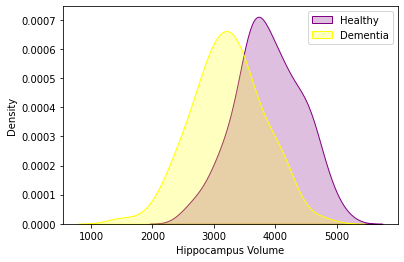

In [179]:
rightHippoND = []
rightHippoD = []

for i in range(len(rightHippo)):
    if dat['Dementia'][i] == 1:
        rightHippoD.append(dat['RightHippoVol'][i])
    else:
        rightHippoND.append(dat['RightHippoVol'][i])

df = pd.DataFrame(rightHippoND,columns=['No Dementia'])
df1 = pd.DataFrame(rightHippoD,columns=['Dementia'])
full = [rightHippoD,rightHippoND]

#rightHippo1 = dat1['RightHippoVol']
#dementia1 = dat1['Dementia']

#df1.plot.kde()
fig = sns.kdeplot(data = df['No Dementia'], color='purple',shade='True')
fig = sns.kdeplot(data = df1['Dementia'], color='yellow',shade='True')
fig.set_xlabel('Hippocampus Volume')
plt.legend(labels=["Healthy","Dementia"])
plt.show()

Part 3 of question 4 

In [180]:
training = [[],[],[]]
testing = [[],[],[]]

for i in range(len(dat)):
    if dat['TrainData'][i] == 1:
        training[0].append(dat['LeftHippoVol'][i])
        training[1].append(dat['RightHippoVol'][i])
        training[2].append(dat['Dementia'][i])
    else:
        testing[0].append(dat['LeftHippoVol'][i])
        testing[1].append(dat['RightHippoVol'][i])
        testing[2].append(dat['Dementia'][i])
        


Split dataset into training and testing sets

In [181]:
healthyTrain1 = [[],[],[]]
dementiaTrain1 = [[],[],[]]

for i in range(len(training[0])):
    if training[2][i] == 1:
        dementiaTrain1[0].append(training[0][i])
        dementiaTrain1[1].append(training[1][i])
        dementiaTrain1[2].append(training[2][i])
    else:
        healthyTrain1[0].append(training[0][i])
        healthyTrain1[1].append(training[1][i])
        healthyTrain1[2].append(training[2][i])

healthyTrain = pd.DataFrame()
dementiaTrain = pd.DataFrame()
#print(healthyTrain1[0])
healthyTrain['LeftHippoVol'] = healthyTrain1[0]
healthyTrain['RightHippoVol'] = healthyTrain1[1]
healthyTrain['Dementia'] = healthyTrain1[2]
dementiaTrain['LeftHippoVol'] = dementiaTrain1[0]
dementiaTrain['RightHippoVol'] = dementiaTrain1[1]
dementiaTrain['Dementia'] = dementiaTrain1[2]
    

Split Training set into dementia set and healthy set

In [182]:
x1HealthyMean = healthyTrain['RightHippoVol'].mean()
x1HealthyVar = healthyTrain['RightHippoVol'].var()
x2HealthyMean = healthyTrain['LeftHippoVol'].mean()
x2HealthyVar = healthyTrain['LeftHippoVol'].var()

x1DementiaMean = dementiaTrain['RightHippoVol'].mean()
x1DementiaVar =dementiaTrain['RightHippoVol'].var()
x2DementiaMean = dementiaTrain['LeftHippoVol'].mean()
x2DementiaVar = dementiaTrain['LeftHippoVol'].var()


Calculated means and variance for each class

In [183]:
def normalize(x,meantype,vartype):
    sd = math.sqrt(vartype)
    y =(1/( sd* math.sqrt(2*math.pi))) * math.exp(-(math.pow((x-meantype),2)) / (2* math.pow(sd,2)))
    return y


function that normalizes each variable

In [184]:
filler1 = []
filler2 = []
for i in range(len(healthyTrain)):
    filler1.append(0)
for i in range(len(dementiaTrain)):
    filler2.append(0)

healthyTrain['NormalizedX1'] = filler1
healthyTrain['NormalizedX2'] = filler1
dementiaTrain['NormalizedX1'] = filler2
dementiaTrain['NormalizedX2'] = filler2

#print(x1HealthyMean)


In [185]:
for i in range(len(healthyTrain)):
    
    healthyTrain['NormalizedX1'][i] = normalize(healthyTrain['RightHippoVol'][i],x1HealthyMean,x1HealthyVar)
    healthyTrain['NormalizedX2'][i] = normalize(healthyTrain['LeftHippoVol'][i],x2HealthyMean,x2HealthyVar)
    
for i in range(len(dementiaTrain)):
    dementiaTrain['NormalizedX1'][i] = normalize(dementiaTrain['RightHippoVol'][i],x1DementiaMean,x1DementiaVar)
    dementiaTrain['NormalizedX2'][i] = normalize(dementiaTrain['LeftHippoVol'][i],x2DementiaMean,x2DementiaVar)
    


normalized each x1 and x2 for each class

In [186]:
healthyLikelihoodx1mean = healthyTrain['NormalizedX1'].mean()
healthyLikelihoodx1var = healthyTrain['NormalizedX1'].var()
healthyLikelihoodx2mean = healthyTrain['NormalizedX2'].mean()
healthyLikelihoodx2var = healthyTrain['NormalizedX2'].var()

dementiaLikelihoodx1mean = dementiaTrain['NormalizedX1'].mean()
dementiaLikelihoodx1var = dementiaTrain['NormalizedX1'].var()
dementiaLikelihoodx2mean = dementiaTrain['NormalizedX2'].mean()
dementiaLikelihoodx2var = dementiaTrain['NormalizedX2'].var()

priorProbHealthy = len(healthyTrain)/len(training[0])
priorProbDementia = len(dementiaTrain)/len(training[0])


print(healthyLikelihoodx1var)


0.0


Set up variables to calculate the Posterior probability

In [187]:
count = 0
for i in range(len(testing[0])):
    x = normalize(testing[1][i],x1HealthyMean,x1HealthyVar) * normalize(testing[0][i],x2HealthyMean,x2HealthyVar) * priorProbHealthy
    y = normalize(testing[1][i],x1DementiaMean,x1DementiaVar) * normalize(testing[0][i],x2DementiaMean,x2DementiaVar) * priorProbDementia
    if x > y and testing[2][i] == 0:
        count += 1
    elif x < y and testing[2][i] == 1:
        count += 1
    else:
        count = count
        
print(count/len(testing[0]))

0.7079646017699115


This runs the naive classifier on each row and results in an accuracy of 0.7096 percent